<b>This capstone shows analysis of "Suicide rates" in different countries from 1985 to 2016.</b>

<b>Dataset description:</b>

Suicide Rates Overview 1985 to 2016: This is an open source dataset which consists of information related to suicide counts among different countries
for the period 1985-2016. This dataset is compiled from the references given below. Let us analyse this data set to understand the features and identify any correlation between
them. 

References:
 - United Nations Development Program. (2018): Retrieved from http://hdr.undp.org/en/indicators/137506
 - World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from  - http://databank.worldbank.org/data/source/world-development-indicators#
 - Szamil. (2017). Suicide in the Twenty-First Century [dataset]: Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook
 - World Health Organization. (2018). Suicide prevention: Retrieved from http://www.who.int/mental_health/suicide-prevention/en/

Inspiration:
Suicide Prevention.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

In [2]:
# Importing data to a dataframe.
data = pd.read_csv("/Users/harshini/Desktop/Thinkful/Data/suicidedata.csv")
# Observing the data.
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


<b>Observations from the data:</b><br/>
    
1) There are total 12 features in the data.<br/>
2) "HDI for year" has missing data.<br/>
3) "gdp_for_year" is represented as string and it has to be converted to integer type.<br/>
4) "age" is grouped into years.<br/>
5) "country-year" is a combination of "country" and "year" features from the data.

In [3]:
# Finding null values and datatypes of features.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
gdp_for_year ($)      27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


<b>Observations from the above:</b><br/>
    
1) Total "27820" entries.<br/>
2) Numerical features - year, suicides_no, population, suicides/100k pop, HDI for year and  gdp_per_capita.<br/>
3) Categorical features -  country, sex, age, country-year, gdp_for_year and generation.<br/>
4) "HDI for year" has Null values.

<b>Observe the distributions of numerical and categorical features.</b><br/>

In [4]:
# Numerical features.
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
# Categorical features.
data.describe(include=['O'])

,country,sex,age,country-year,gdp_for_year ($),generation
count,27820,27820,27820,27820,27820,27820
unique,101,2,6,2321,2321,6
top,Austria,female,75+ years,Canada2011,"48,187,039,000",Generation X
freq,382,13910,4642,12,12,6408


<b>Observations from the above:</b><br/>

1) Observations for total 101 countries are present in the dataset.<br/>
2) Total 6 types of generations are present in the data.<br/>
3) Data is divided into 6 age group ranges.<br/>

In [6]:
# Identifying null values for all the features
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
gdp_for_year ($)          0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [7]:
# Drop "HDI for year". 
data_new = data.drop(['HDI for year'],axis=1)
# Convert "gdp_for_year" to integer
data_new['gdp_for_year ($)'] = data_new['gdp_for_year ($)'].str.replace(',','').astype(int)
data_new.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2156624900,796,Boomers


<b>Top 5 countries with highest suicide rate.</b><br/>

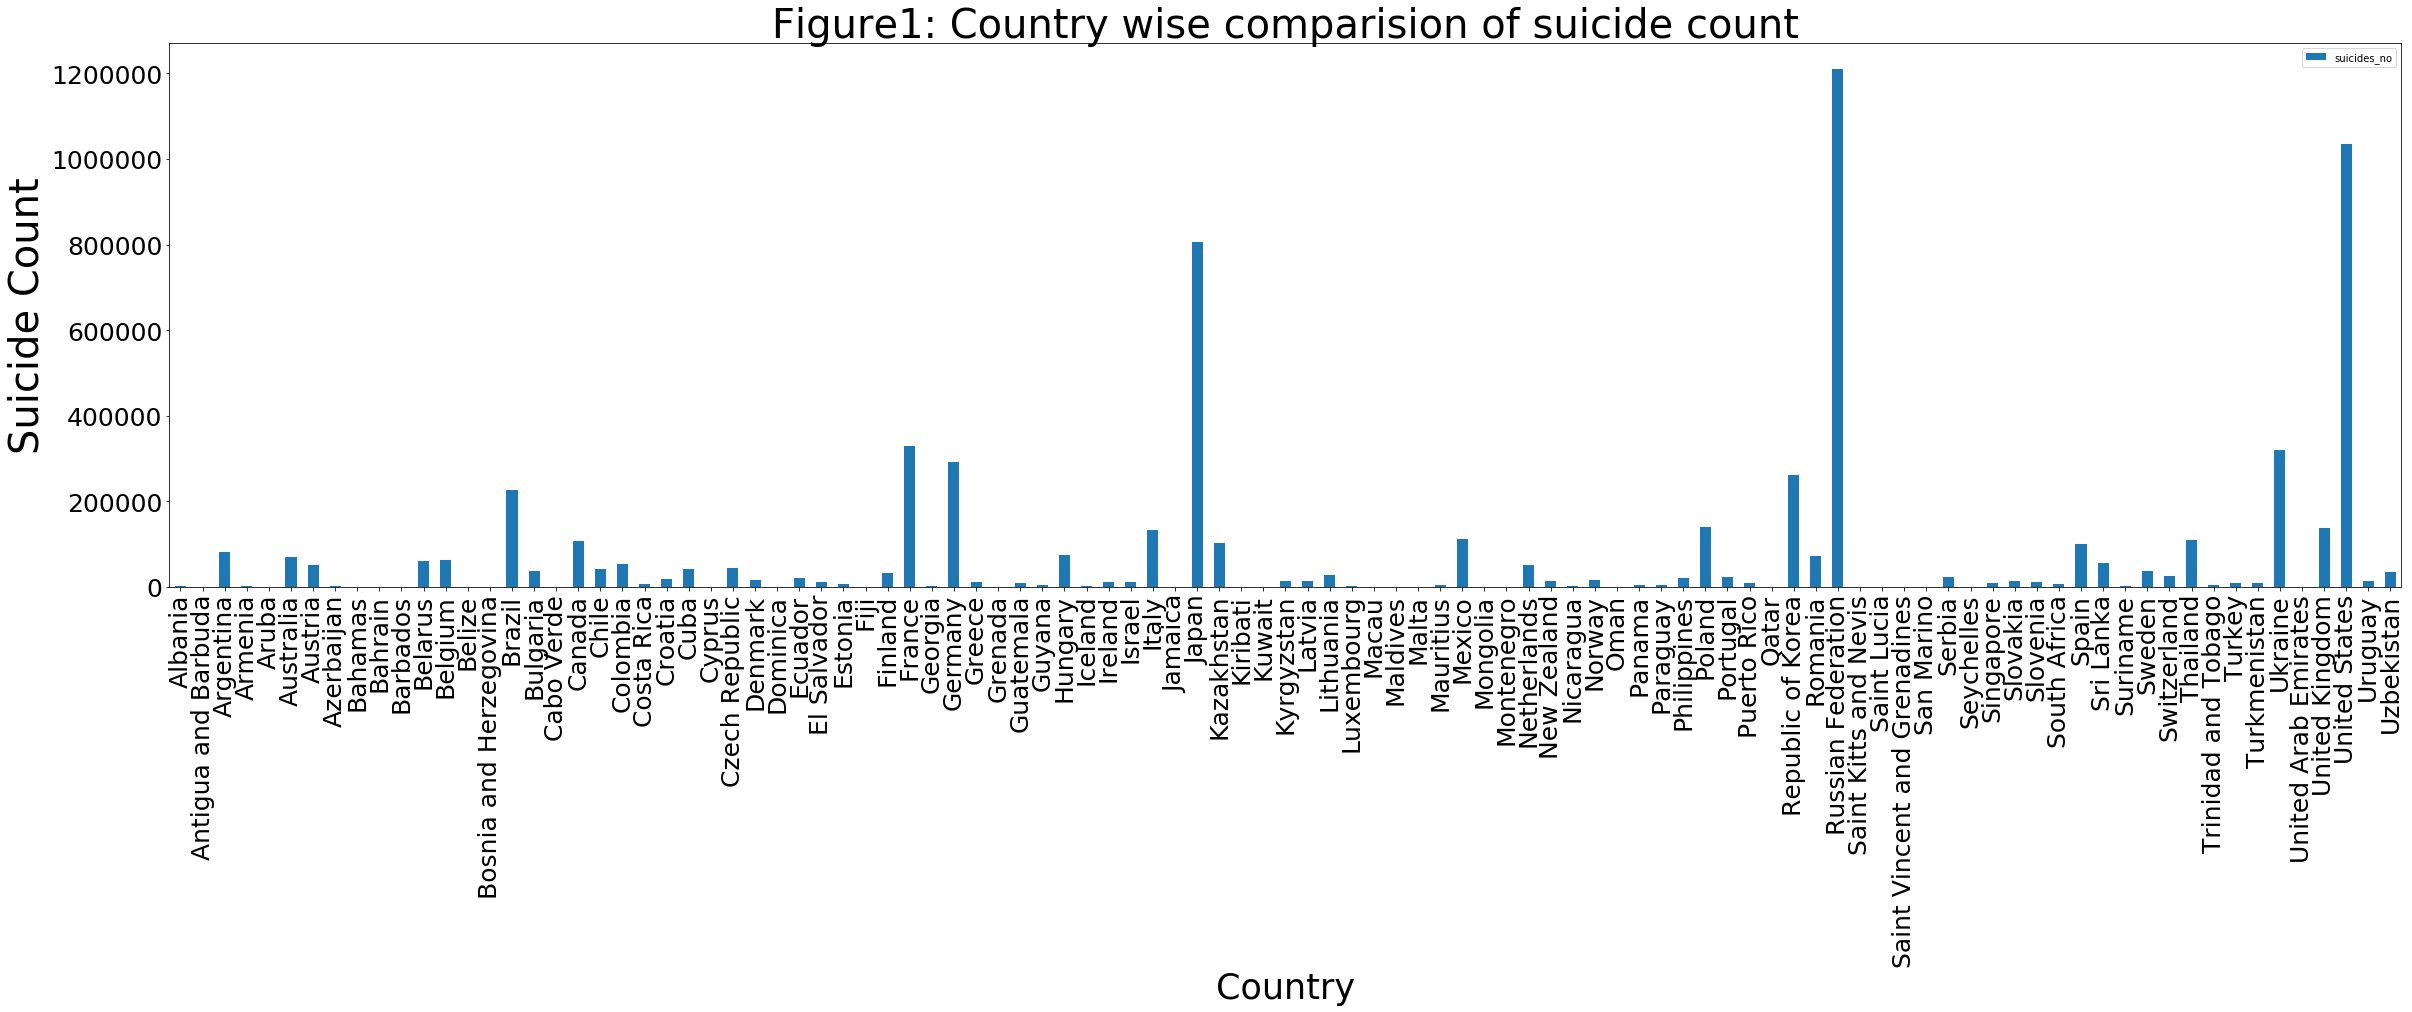

In [8]:
# Country wise comparision of suicide count using bar chart.
data_country = data_new[['country','suicides_no']].groupby(['country']).sum()
data_country.plot(kind='bar', figsize=(40,10), fontsize=25)
plt.title("Figure1: Country wise comparision of suicide count",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Suicide Count",fontsize=40)
plt.show()

<b>Observation:</b> From the above graph, it is clear that top 5 countries with highest suicide rate are "Russian Federation", "United States", "Japan", "France" and "Ukraine"<br/>

<b>Gender and Age wise comparision of suicide rate.</b><br/>

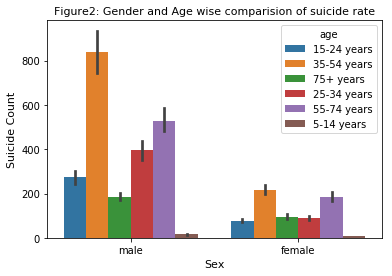

In [9]:
# Gender and Age group comparision of suicide count using bar graph.
gender_plot = sns.barplot(x='sex', y='suicides_no', hue='age', data=data_new)
plt.title("Figure2: Gender and Age wise comparision of suicide rate",fontsize=11)
plt.xlabel("Sex",fontsize=11)
plt.ylabel("Suicide Count",fontsize=11)
plt.show()

<b>Observations from the above:</b><br/>

1) <b>Male</b> have higher suicide rate compared to female.<br/>
2) Suicide rate is <b>high</b> in the age group 35-54 for both male and female.<br/>
3) Suicide rate is <b>low</b> in the age group 5-14 years for both male and female.<br/>

<b>Question 1: Is "2016", the year with less number of suicides?</b><br/>

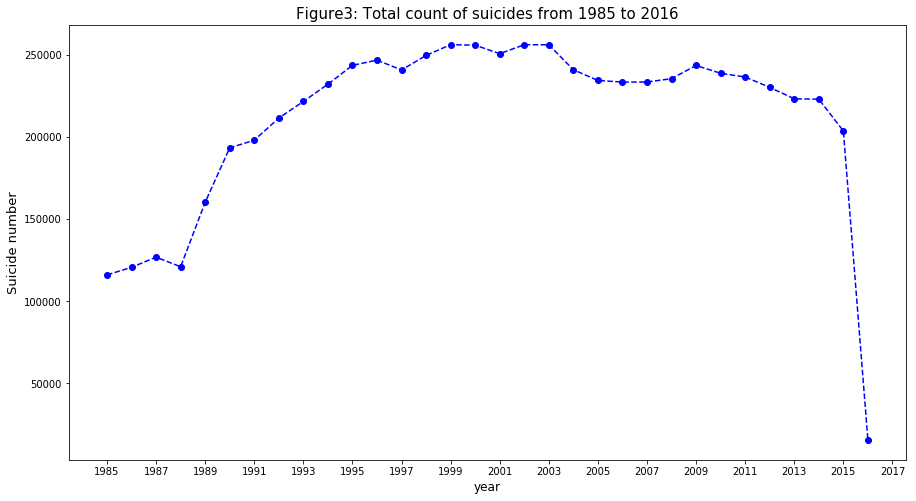

In [10]:
# Suicide count for each year using line plot.
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(data.groupby(['year']).suicides_no.sum(),'bo--')
# Adding lables and title.
tick = ax.set_xticks(range(1985,2018,2))
ax.set_title('Figure3: Total count of suicides from 1985 to 2016',fontsize=15)
ax.set_xlabel('year',fontsize=12)
ax.set_ylabel('Suicide number',fontsize=13)
plt.show()

<b>Observation:</b> From the above graph, there is a sudden drop of suicide count in the year 2016. Let us analyze this in detail. 

<b>Analysis & Approach:</b><br/>
1) Let us look into the data collected for each year.<br/>
2) When I observed the country list(for each year) I found that the list of countries contributed is different for each year.<br/>
3) Let us find out 2 things. First, number of countries contributed every year. Second, if there is a correlation between the number of countries contributed(per year) with the suicide count and total population.

In [11]:
# Number of countries contributed each year.
def count_country(group):
    return len(group.country.unique())
country_no = data.groupby('year').apply(count_country)
country_no.name = 'number_of_countries'
country_no

year
1985    48
1986    48
1987    54
1988    49
1989    52
1990    64
1991    64
1992    65
1993    65
1994    68
1995    78
1996    77
1997    77
1998    79
1999    83
2000    86
2001    88
2002    86
2003    86
2004    84
2005    84
2006    85
2007    86
2008    85
2009    89
2010    88
2011    86
2012    81
2013    80
2014    78
2015    62
2016    16
Name: number_of_countries, dtype: int64

<b>Inference1:</b><br/>
1) It is observed from the above that minimum '48' countries contributed every year except for '2016'.<br/>
2) The data is collected only from '16' countries for the year 2016.

In [12]:
# Create a new data frame with feature "number_of_countries" which contributed data for each year.
yr_grouped = data.groupby('year')
annual_pop = yr_grouped.population.sum()
annual_suicides = yr_grouped.suicides_no.sum()
country_df = pd.concat([country_no,annual_suicides,annual_pop],axis = 1)
country_df.head()

,number_of_countries,suicides_no,population
year,,,
1985,48,116063,1008600086
1986,48,120670,1029909613
1987,54,126842,1095029726
1988,49,121026,1054094424
1989,52,160244,1225514347


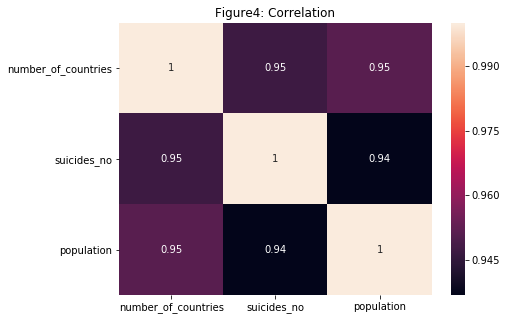

In [13]:
# Heatmap to understand correlation between number of countries contributed per year with suicide count and population.
plt.figure(figsize=(7,5))
sns.heatmap(country_df.corr(),annot = True)
plt.title("Figure4: Correlation",fontsize=12)
plt.show()

<b>Inference2:</b><br/>
From the above graph, we can observe that there is a high correlation between "number of countries" with "suicides_no" and  "population".<br/>
<b>Conclusion:</b><br/>
From inference1 and inference2, since there are less number of countries contributed for the year 2016 and there is a correlation between "no. of countries contributed" and "suicide count", we can interpret that 2016 is <b>NOT</b> the year with lowest suicide count.

<b>Question 2: If you used this data to predict suicide count for the year "2017" for the countries Australia and Serbia, which prediction would you be more confident in?</b><br/>

In [14]:
# Create 2 box plots.
# 1) To project suicide count data for Australia.
# 2) To project suicide count data for Serbia.
# Create a function to define outline and fill colors for the box plots.

def add_color(bp):
    for box in bp['boxes']:
    # change outline color
        box.set( color='#7570b3', linewidth=2)
    # change fill color
        box.set( facecolor = '#1b9e77' )
## change color and linewidth of the whiskers
    for whisker in bp['whiskers']:
        whisker.set(color='#7570b3', linewidth=2)
## change color and linewidth of the caps
    for cap in bp['caps']:
        cap.set(color='#7570b3', linewidth=3)
## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='#b2df8a', linewidth=3)
## change the style of fliers and their fill
    for flier in bp['fliers']:
        flier.set(marker='o', color='#e7298a', alpha=0.5)
        
# Segregating Serbia and Australia data
data_new.index = data_new.country
ser_year = data_new.loc['Serbia',:].groupby('year').aggregate(np.sum)
aus_year = data_new.loc['Australia',:].groupby('year').aggregate(np.sum)

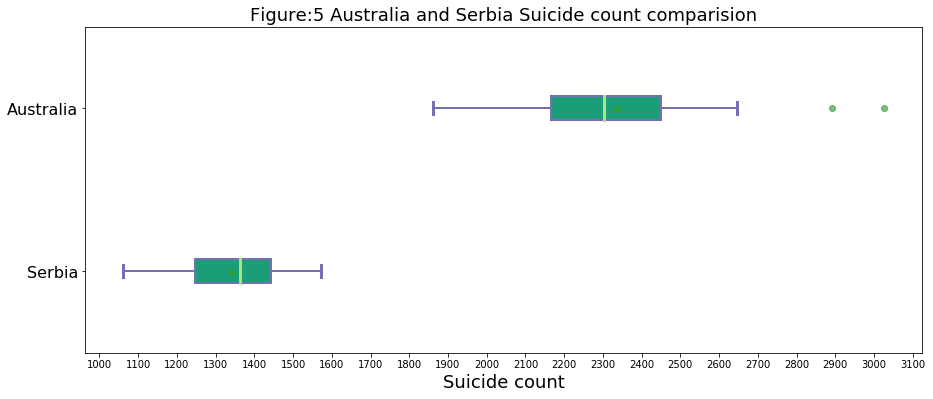

In [16]:
# Australia and Serbia suicide count comparision using box plots.
ser_sui = ser_year.suicides_no
aus_sui = aus_year.suicides_no
input1 = [ser_sui,aus_sui]
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15,6)
box_plot1 = ax.boxplot(input1,0,'gD',0,patch_artist=True,showmeans=True)
ax.set_title('Figure:5 Australia and Serbia Suicide count comparision',fontsize=18)
ax.set_xlabel('Suicide count',fontsize=18)
plt.xticks(np.arange(1000, 3200, step=100))
ax.set_yticklabels(['Serbia', 'Australia'],fontsize=16)

add_color(box_plot1)


In [17]:
# Summary statistics to understand the consistency
std_aus = aus_year.suicides_no.std()
std_ser = ser_year.suicides_no.std()
print("Standard deviation of suicide count for Australia is: ",std_aus)
print("Standard deviation of suicide count for Serbia is: ",std_ser)

Standard deviation of suicide count for Australia is:  255.31231494175822
Standard deviation of suicide count for Serbia is:  139.34418055159236


<b>Analysis:</b><br/> 

1) From the above box plots, it is observed that Serbia's suicide count varies much less than that of Australia.<br/>
2) Suicide count data is widely spread out in Australia compared to Serbia where it is bunched closely. This indicates that Serbia has higher consistency in the suicide count compared to Australia.<br/>
3) Let us use <b>summary statistics</b> to confirm the above observation of consistency b/w Serbia and Australia.<br/>
4) Calculate standard deviations for both Australia and Serbia. From the above, std_aus = 255 and std_ser = 139 i.e Australia has high standard deviation compared to Serbia.<br/> 
5) Higher standard deviation of Australia and lower standard deviation of Serbia indicate that there is less consistency for Australia compared to Serbia. Hence we can infer that "Serbia has more consistent suicide count than Australia".<br/>
6) Serbia's more consistent "suicide count" should make predictions more dependable than the other variable i.e. Australia's suicide count.


<b>Conclusion:</b><br/> 
From the above analysis it is infered that we can be more confident on Serbia's prediction of suicide count for the year 2017 than that of Australia.<br/>

<b>Question 3: Is poverty the main reason for majority of suicides?</b><br/>

Below is the approach I followed.<br/>
1) Identify top countries with highest suicide rates.<br/>
2) Observe the gdp_per_capita of those countries.<br/>
3) Also identify the generation with highest suicide rates.<br/>

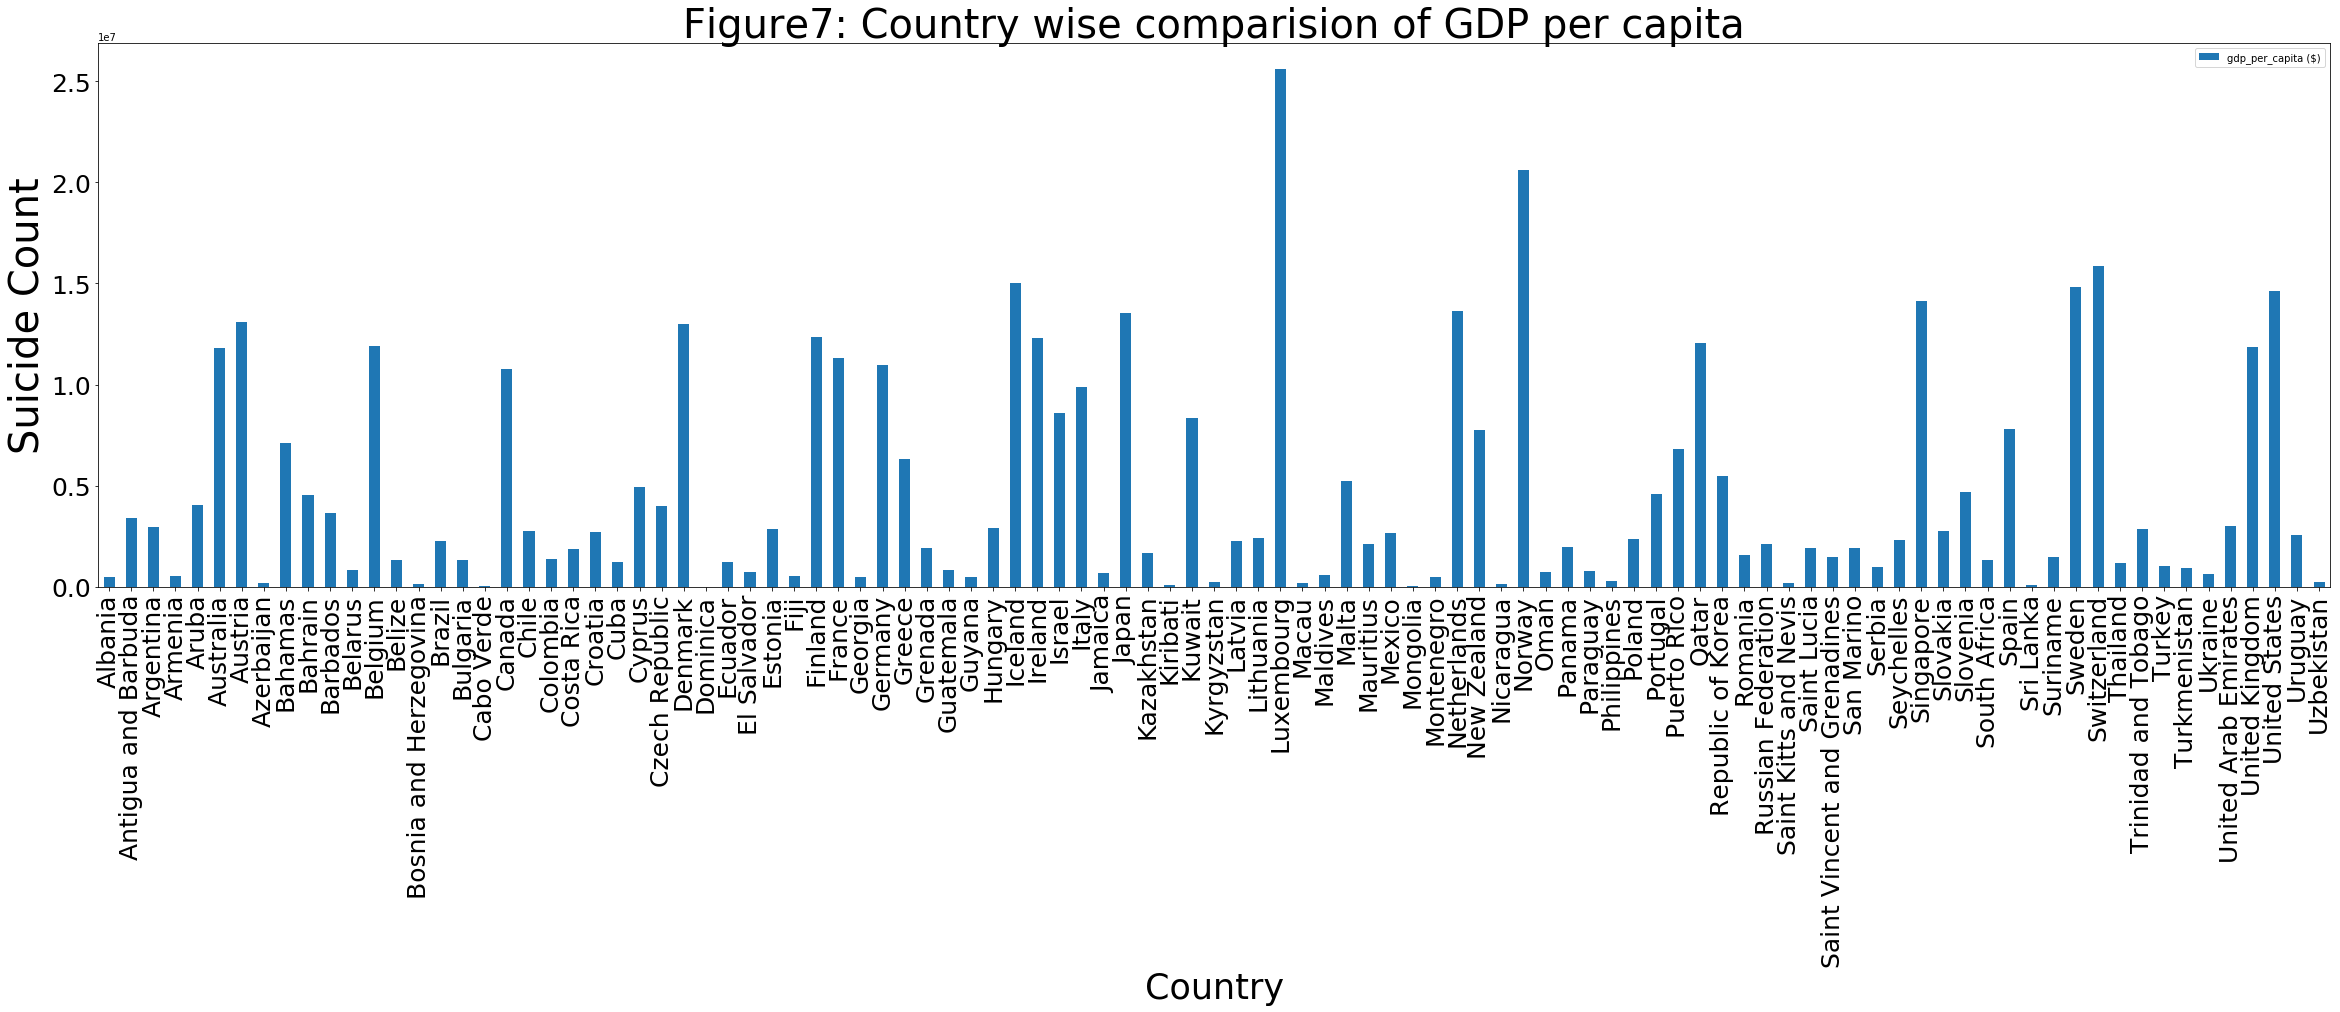

In [18]:
# gdp_per_captia with respect to each country using bar plot.
data_gdp = data[['country','gdp_per_capita ($)']].groupby(['country']).sum()
data_gdp.plot(kind='bar', figsize=(40,10), fontsize=25)
plt.title("Figure7: Country wise comparision of GDP per capita",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Suicide Count",fontsize=40)
plt.show()


<b>Inference1: </b>From Figure1, we already identified that "Russian Federation", "United States", "Japan", 
"Ukraine" and "France" are the top 5 countries with highest suicide rates. From the above graph, it is clear that gdp_per_capita for these countries is relatively high compared to many other countries and does NOT fall in the low gdp category.

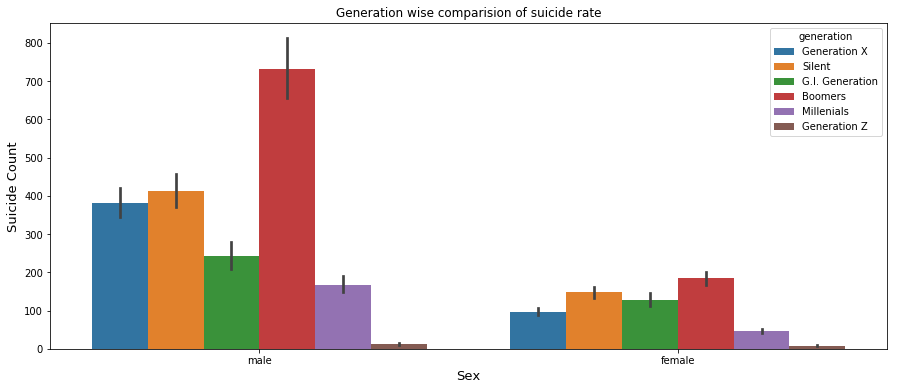

In [19]:
# Generation wise comparision of suicide rate using bar graph.
generation_plot = sns.barplot(x='sex', y='suicides_no', hue='generation', data=data_new)
plt.title("Generation wise comparision of suicide rate",fontsize=12)
plt.xlabel("Sex",fontsize=13)
plt.ylabel("Suicide Count",fontsize=13)
plt.show()

<b>Inference2:</b> From the above graph, it is clear that generation "Boomers" have highest suicide rate among both male and female. But boomers are the richest generation comparatively. 

<b>Conclusion:</b> From the above two inferences(1&2), we can conclude that poverty is not the main reason for suicide rate.

<b>Future Research:</b><br/>

<b>Question1: </b> What is the reason behind highest suicide rate among people under the age group of 35-54?<br/>
<b>Approach:</b> For this, we have to collect more information like Mental Health status, Employment status, PR, Income etc. and use "Cluster Analysis" data science technique to identify similar attributes as well as differences in the data among different age groups.

<b>Question2: </b> What is the reason for outliers in the suicide count of Australia?<br/>
<b>Approach:</b> The outliers contradict with expected behaviour or predicted pattern. We have to research on to understand why there is a drastic increase in the suicide count for Australia.
"Anamoly detection" data science technique can be used to identify the countries with extreme suicide counts which deviate from the expected pattern and we can do more research on the factors like economy, mental health status etc with respect to the countries.<br/>